In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import metodos_integracao_numerica as int_num
from metodos_minimos_quadrados import minimos_quadrados_cont as mmq_cont

### Função:
$$\begin{equation}\label{solexat1}
u(x) = c_1 e^{-\tfrac{x}{\sqrt{\varepsilon}}} + c_2 e^{\tfrac{x}{\sqrt{\varepsilon}}}+1
\end{equation}$$ onde $c_1 = -1-c_2$ e $c_2 = \dfrac{e^{-\tfrac{1}{\sqrt{\varepsilon}}}-1}
{e^{\tfrac{1}{\sqrt{\varepsilon}}}-e^{-\tfrac{1}{\sqrt{\varepsilon}}}}$.

Adotando $x \in [0,1]$ e $\epsilon = 0.001$

In [2]:
def c2(epsilon):
    return (math.exp(-1/math.sqrt(epsilon)) - 1)/(math.exp(1/math.sqrt(epsilon)) - math.exp(-1/math.sqrt(epsilon)))

def c1(epsilon,c2):
    return -1-c2(epsilon)

def analitica_PVC(x,epsilon):
    return c1(epsilon,c2) * math.exp(-x/math.sqrt(epsilon)) + c2(epsilon)* math.exp(x/math.sqrt(epsilon)) + 1

def u(x):
    return analitica_PVC(x,0.001)

## Utilizando Mínimos Quadrados de diversas ordens para aproximação

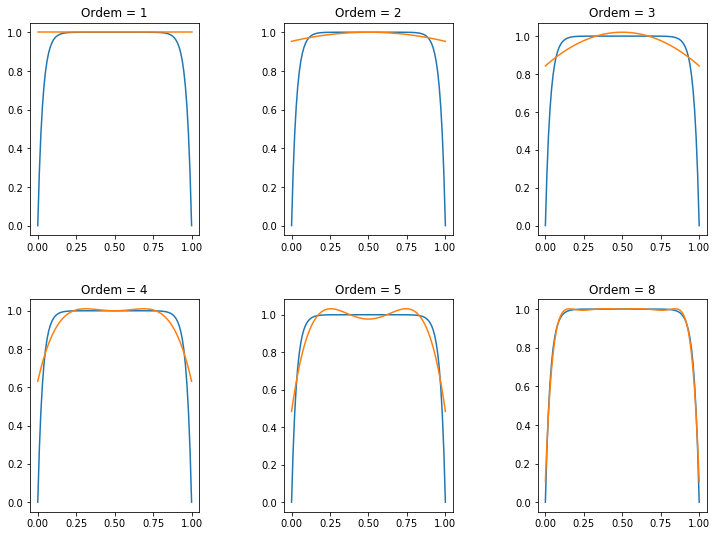

In [19]:
ordens = [1,2,3,4,5,8]

h = 0.01
x = np.arange(0,1+h,h)
y = [u(xi) for xi in x]

fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=(10, 9))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)
c = 0
l = 0

for ordem in ordens:
    axarr[l,c].plot(x,y, label='Dados') # plotando os pontos dados
    
    reg = mmq_cont(u,0,1,ordem) # deteterminando a função de regressão
    
    r = [reg(xi) for xi in x]  
    
    axarr[l,c].plot(x, r) # plotando valores obtidos
    
    axarr[l,c].set_title('Ordem = '+str(ordem))
    
    c+=1
    if (c >= 3): # auxiliares para plot em formato de tabela
        c = 0
        l += 1

plt.savefig('mmq.png', bbox_inches='tight')
plt.show()

## Utilizando Mínimos Quadrados em subdivisões

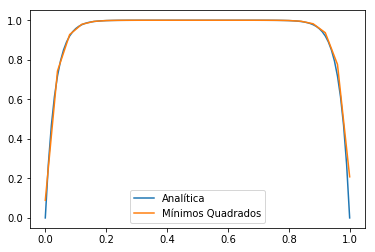

In [12]:
intervalo = 1/25

h = 0.01
x = np.arange(0,1+h,h)
y = [u(xi) for xi in x]
y_mmq = []

plt.plot(x,y, label='Analítica')

for i in np.arange(0,1+intervalo,intervalo):
    reg = mmq_cont(u,i,i+intervalo,1) # determinando a função de regressão
    
    r = [reg(xi) for xi in np.arange(i,i+intervalo)]
    
    for v in r:
        y_mmq.append(v)

plt.plot(np.arange(0,1+intervalo,intervalo),y_mmq, label='Mínimos Quadrados')    

plt.legend()
plt.savefig('mmq_repetida.png', bbox_inches='tight')
plt.show()

Calculando o erro dos plots anteriores

In [7]:
def normaL2(a,b,u,uh,k):
    x = np.arange(a,b,1/k)
        
    sum = 0
    
    for xi in x:
        func = lambda x: (u(x) - uh(x))**2
        sum += int_num.simpson3_8(func,xi,xi+1/k)
        
    return np.sqrt(sum)

In [8]:
k = 25
a = 0
b = 1

qA = []

for i in range(1,6):
    uh = mmq_cont(u,a,b,i)
    qA.append(normaL2(a,b+1/k,u,uh,k))

In [9]:
qA

[0.4637489538228189594,
 0.44983728612019179436,
 0.41897572201918294394,
 0.3551103732299138328,
 0.31251154084255948975]

In [10]:
intervalo = 1/k 

sum = 0

for i in np.arange(0,1,intervalo):
    uh = mmq_cont(u,i,i+intervalo,1) # determinando a função de regressão
    
    sum += normaL2(i,i+intervalo,u,uh,25)**2
    
qB = np.sqrt(sum)

In [11]:
qB

0.19506119645307901171